<font color='blue'> please import packages below before starting </font>

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

# Logistic Regression

In this section, we are going to implement a logistic regression. <br>
Let's bring up the data.

In [2]:
df = pd.read_csv('Student-Pass-Fail-Data.csv')

A brief look at what we have:

In [3]:
# Check the dataset
print(df.shape)
df.head()

(1000, 3)


,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


We want to predict whether the student gets __pass or fail__. <br>
So, let's split the table into two - (1) self_study_daily and tution_monthly (2) pass_or_fail

In [4]:
# Define 'Self_Study_Daily', 'Tution_Monthly' as input data and 'Pass_Or_Fail' as output target
X = df.drop('Pass_Or_Fail', axis=1) # axis=0(index), axis=1(column)
y = df.Pass_Or_Fail

From now on, it's exactly the same as we did with the linear regression. <br>
The only difference is that we have to call the class variable __LogisitcRegression()__.

In [5]:
# Split the data and target into training dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

In [6]:
# Create the logistic regression object
logreg = LogisticRegression()

In [7]:
# Train the model using the training sets
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
# Make predictions using the testing set
y_pred = logreg.predict(X_test)

In [9]:
# The coefficients
print("Coefficients: \n", logreg.coef_)
print("Intercept: \n", logreg.intercept_)

Coefficients: 
 [[ 2.54032198 -0.62709942]]
Intercept: 
 [1.23380331]


For the classification problem, we can compute accuracy score. <br>
Again, we have useful tools from the package that we have called above. <br>
Try calling __metrics.accuracy_score__.

In [10]:
# Find the accuracy
acc = metrics.accuracy_score(y_test, y_pred) * 100 # percentage
print("The test accuracy: %.2f" % acc)

The test accuracy: 95.50


#### ln(p/(1-p)) = 2.54x1 - 0.63x2 + 1.23 (x1: "Self_Study_Daily", x2: "Tution_Monthly")

We can randomly generate an input data which, in this case, is a new student. <br>
For np.array([a,b]), __a__ would be the value for self_study_daily whereas __b__ would be tution monthly.

In [11]:
# Predicting whether a new student will fail or pass
First_friend = logreg.predict((np.array([4, 38]).reshape(1, -1)))
First_friend 

array([0])

Did the student got passed? Let's try another student.

In [12]:
# Predicting whether a new studuent will fail or pass
Second_friend = logreg.predict((np.array([8, 29]).reshape(1, -1)))
Second_friend

array([1])

Note that we reshaped our input with the function __reshape__. <br>
This is because the function gets that data in the form of samples (e.g. [[sample1],[sample2],.. and so on]) <br>
-1 means that we're allocating all the remaining dimension of the number of data into the second dimension.

In [13]:
np.array([1, 11]).reshape(1, -1)

array([[ 1, 11]])

# [Practice 2] : the digit dataset (classification)
### P2.1. You should fill in the blank between # and # with code

In [14]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# Load the dataset (Digits Dataset)
digits = load_digits()
X, y = digits.data, digits.target

In [18]:
# Check the dataset
#######################################
# 1797개의 digits dataset
print(X.shape)
# 1개의 digit 당 8*8=64 dimentional features
print(X.shape[1])
#######################################

(1797, 64)
64


### P2.2. You should write down the answers of the number of data and features in ( ? )
#### The number of data : ( 1797 )
#### The number of features : ( 64 )

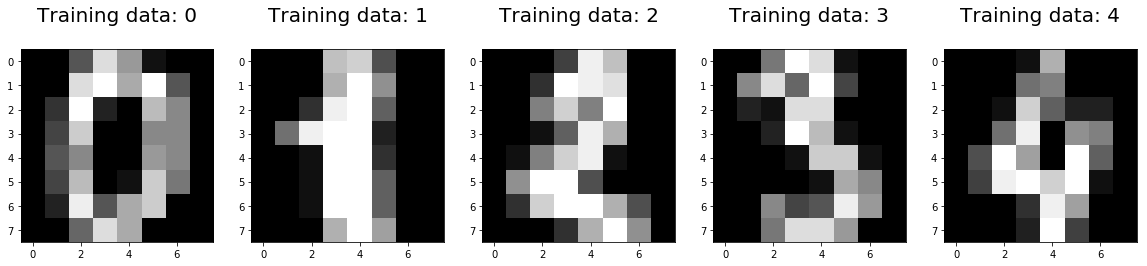

In [19]:
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(X[0:5], y[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title('Training data: %i\n' % label, fontsize=20)

In [20]:
# Split the data into training an dtest sets (Digits Dataset)
#######################################
####### Use random_state = 2020 #######
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2020)
#######################################

In [23]:
# Make an instance of the Model
#################################################
logistic = LogisticRegression()
#################################################

# Train the model using the training sets
#################################################
logistic.fit(X_train, y_train)
#################################################

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
# Make the prediction of first element of test datasets
logistic.predict(X_test[0].reshape(1, -1))

array([4])

### P2.3. You should write down the answer of the first digit of test datasets which fitted model predicts
#### The first digit of test datasets : ( 4 )

In [25]:
# Make the prediction of first ten test datasets
##################################################################
y_pred = logistic.predict(X_test[:10])
print(y_pred)
##################################################################

[4 3 6 4 8 7 2 2 1 2]


### P2.4. You should write down the answer of the first ten digits of test datasets which fitted model predicts
#### The first ten digits of test datasets : (4, 3, 6, 4, 8, 7, 2, 2, 1, 2)

In [26]:
# Make predictions on entire test data
##################################################################
y_pred = logistic.predict(X_test)
##################################################################

In [27]:
# Find the coefficients and Intercept
##################################################################
############# It could be a line or two lines ####################
print("Coefficients: \n", logistic.coef_)
print("Intercepts: \n", logistic.intercept_)

##################################################################

# Find the accuracy an
##################################################################
############# It could be a line or two lines ####################
#print("Test accuracy: %.2f" % (metrics.accuracy_score(y_test, y_pred)*100))
acc = metrics.accuracy_score(y_test, y_pred) * 100
print("Test accuracy: %.2f" % acc)
##################################################################

Coefficients: 
 [[ 0.00000000e+00 -4.06101084e-02 -5.00057306e-02  2.24109001e-02
  -6.53713933e-02 -3.87159755e-01 -2.14741026e-01 -5.02863536e-03
  -1.51070757e-05 -1.00680427e-01 -2.05175000e-02  1.55047710e-01
   1.11857132e-01  2.87287412e-01  2.42044744e-02 -6.55928331e-03
  -3.45996330e-03  1.12748234e-01  1.99660275e-01 -6.03869339e-02
  -3.68736227e-01  2.88537935e-01 -7.62520289e-02 -9.72293755e-03
  -1.72900703e-03  2.17024007e-02 -3.60607215e-02 -1.62437805e-01
  -5.66055095e-01 -3.13209135e-02  1.30473199e-01 -2.16773991e-03
   0.00000000e+00  2.52225320e-01  1.49359814e-01 -1.76344613e-01
  -5.50268998e-01 -8.10864704e-02 -3.90189753e-02  0.00000000e+00
  -4.85963625e-03  7.83256174e-03  1.29411368e-01 -2.19109111e-01
  -4.17501150e-01  3.51969232e-02  1.02629409e-01 -7.32358364e-05
  -1.73030524e-02 -8.32770597e-02  2.21347036e-02  4.02789473e-03
   1.58634043e-01  4.64483721e-02 -2.00348401e-01 -7.51589330e-02
  -4.67592568e-06 -5.04031189e-02 -1.80675592e-01 -1.4752089

### P2.5. You should write down the answer of the test accuracy
#### The test accuracy : ( 96.89 )